#**Importamos librerias**

In [ ]:
!pip install category_encoders
!pip install umap-learn

     |████████████████████████████████| 82 kB 332 kB/s 
     |████████████████████████████████| 80 kB 3.7 MB/s 
     |████████████████████████████████| 1.1 MB 11.4 MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.1-py3-none-any.whl size=76564 sha256=d5670e9eccfe46c2ee387cc21657ad9b4efbb317ba713c1e1672c14e0612d9d7
  Stored in directory: /root/.cache/pip/wheels/01/e7/bb/347dc0e510803d7116a13d592b10cc68262da56a8eec4dd72f
  Created wheel for pynndescent: filename=pynndescent-0.5.5-py3-none-any.whl size=52603 sha256=b028d81e2feedd652f122781b1844e1384676e96fd21e7bdd376a9e5788df4b3
  Stored in directory: /root/.cache/pip/wheels/af/e9/33/04db1436df0757c42fda8ea6796d7a8586e23c85fac355f476
Successfully built umap-learn pynndescent


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from io import StringIO

import category_encoders as ce
import umap
from sklearn.preprocessing import StandardScaler

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


#**Importamos data**

In [ ]:
def cargarDataFrame(url):
  headers = {"User-Agent": "Mozilla/5.0 (Macintosh; Intel Mac OS X 10.14; rv:66.0) Gecko/20100101 Firefox/66.0"}
  req = requests.get(url, headers=headers)
  data = StringIO(req.text)
  df = pd.read_csv(data)
  return df

In [ ]:
url='https://littlegigant.com/bbva/df_final.csv'
df=cargarDataFrame(url)

In [ ]:
# vaciamos las columnas sin importancia y las filas con nulos

df.dropna(axis=0, how='any',inplace=True)

df.drop(columns=['Unnamed: 0','CODIGO_CLIENTE','PERIODO','NUMERO_DOCUMENTO'],inplace=True)

In [ ]:
# Vamos a llevarnos la columna de interes nada mas

encoder = ce.BinaryEncoder(cols='UBIGEO_DIRECCION')

dataset= encoder.fit_transform(df)

dataset.sample(5)

#DATASET LISTOOOOOOOOOOOOOO

,EDAD,UBIGEO_DIRECCION_0,UBIGEO_DIRECCION_1,UBIGEO_DIRECCION_2,UBIGEO_DIRECCION_3,UBIGEO_DIRECCION_4,UBIGEO_DIRECCION_5,UBIGEO_DIRECCION_6,UBIGEO_DIRECCION_7,UBIGEO_DIRECCION_8,UBIGEO_DIRECCION_9,UBIGEO_DIRECCION_10,SEGMENTO_COMERCIAL,AFILIACION_SMS,AFILIACION_BANCA_ONLINE,INGRESO_MENSUAL,GRUPO_RIESGO,RIESGO1,RIESGO2,TIPO_DOCUMENTO,SALDO_MEDIO_VISTA,SALDO_MEDIO_AHORRO,SALDO_MEDIO_CTS,SALDO_MEDIO_PLAZO,SALDO_MEDIO_FONDO_MUTUO,SALDO_MEDIO_AUTOS,SALDO_MEDIO_CONSUMO,SALDO_MEDIO_TARJETAS,SALDO_MEDIO_HIPOTECARIO,SALDO_MEDIO_CARTERA,SALDO_MEDIO_LEASING,SALDO_MEDIO_PRESTAMOS_COMERCIALES,SALDO_MEDIO_COMEXT,SALDO_MEDIO_TJ_EMPRESAS,FAM_COBRANZAS,FAM_COMEX,FAM_PAGOHABERES,FAM_PROVEEDORES,FAM_SUPPLY,FAM_VISANET,T_NETCASH,T_SEGURO,T_WALLET,T_TCAMBIO,T_AFILIACION_DIGITAL,T_CARGO_RECURRENTE,SALDO_MEDIO_INVERSION_RENTABLE,SALDO_MEDIO_CARTERA_ATRASADA,VINCULACION_PN,VINCULACION_EMPRESA,SALDO_PUNTUAL,MARGEN_FINANCIERO,COMISIONES,MARGEN_BRUTO,EXPOSICION_DEFAULT,PERDIDA_ESPERADA,NUMERADOR_RATIO_RENTABILIDAD,DENOMINADOR_RATIO_RENTABILIDAD,RATIO_RENTABILIDAD,GENERO_M,ESTADO_CIVIL_D,ESTADO_CIVIL_OTROS,ESTADO_CIVIL_S,ESTADO_CIVIL_V
392045,30.0,0,0,0,0,0,1,1,1,1,0,1,1,1,1,2310.00,0,0,0,1,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,1,0,0.0,0.0,0,0,0.00,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.00000,1,0,0,1,0
537778,23.0,0,1,1,1,0,0,0,1,0,1,1,1,1,1,899.13,0,0,0,1,0.0,2.28,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,1,0,0.0,0.0,0,0,2.28,0.036024,0.0,0.036024,0.0,0.0,-5.273246,0.006214,-848.58822,1,0,0,1,0
332028,36.0,0,0,0,0,0,0,0,1,0,1,0,1,1,0,1161.87,2,1,0,1,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,0,0.00,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.00000,1,0,0,1,0
402278,77.0,0,0,0,0,1,1,0,0,1,1,1,1,0,0,2834.56,1,0,0,1,0.0,15140.53,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,0,14843.79,358.447841,0.0,358.447841,0.0,0.0,252.705728,63.176432,4.00000,0,0,0,0,0
801822,67.0,0,0,0,1,0,1,0,1,0,1,1,1,0,0,2820.29,2,2,0,1,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,1,0,0.0,0.0,0,0,0.00,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.00000,1,0,0,0,0


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 800253 entries, 0 to 919323
Data columns (total 64 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   EDAD                               800253 non-null  float64
 1   UBIGEO_DIRECCION_0                 800253 non-null  int64  
 2   UBIGEO_DIRECCION_1                 800253 non-null  int64  
 3   UBIGEO_DIRECCION_2                 800253 non-null  int64  
 4   UBIGEO_DIRECCION_3                 800253 non-null  int64  
 5   UBIGEO_DIRECCION_4                 800253 non-null  int64  
 6   UBIGEO_DIRECCION_5                 800253 non-null  int64  
 7   UBIGEO_DIRECCION_6                 800253 non-null  int64  
 8   UBIGEO_DIRECCION_7                 800253 non-null  int64  
 9   UBIGEO_DIRECCION_8                 800253 non-null  int64  
 10  UBIGEO_DIRECCION_9                 800253 non-null  int64  
 11  UBIGEO_DIRECCION_10                8002

In [ ]:
categorical_cols=[

                  dataset.columns[k]

                    for k in range(len(dataset.columns))

                        if

                            dataset[dataset.columns[k]].dtype
                                            in ['int64']

                    ]

float_cols=[

                  dataset.columns[k]

                    for k in range(len(dataset.columns))

                        if

                            dataset[dataset.columns[k]].dtype
                                            in ['float64']

                    ]


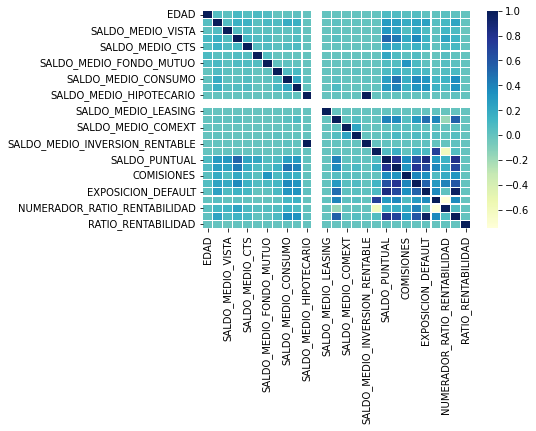

In [ ]:
# analizamos las correlaciones linales de las variables continuas
corr = dataset[float_cols].corr(method = 'pearson')
mask = np.zeros_like(corr)
sns.heatmap(corr, annot=False,linewidths=0.1,cmap="YlGnBu")

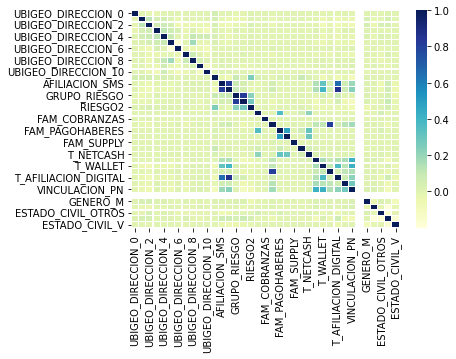

In [ ]:
# correlacion entre variables

# analizamos las correlaciones linales de las variables continuas
corr = dataset[categorical_cols].corr(method = 'pearson')
mask = np.zeros_like(corr)
sns.heatmap(corr, annot=False,linewidths=0.1,cmap="YlGnBu")

In [ ]:
# Estandarizamos las variables de entrada

# extraemos el target antes

target_cols=['NUMERADOR_RATIO_RENTABILIDAD','DENOMINADOR_RATIO_RENTABILIDAD',
                                'RATIO_RENTABILIDAD']

target=dataset[target_cols]


float_norm=dataset.drop( columns=categorical_cols+ target_cols,axis=1 )

scaler=StandardScaler().fit(float_norm)

features_float_cols=filtered_list=[float_feature for float_feature in float_cols
                                   if float_feature not in target_cols]

float_norm=pd.DataFrame(
        scaler.transform(float_norm),
        columns=features_float_cols,index=dataset.index)

dataset.drop(columns=float_cols,inplace=True)

dataset=pd.concat([dataset,float_norm,target], axis=1)

# es demasiado grande para trabajarlo vamos a trabajar con una muestra

muestra=dataset.sample(30000)

target=muestra[target_cols]

features=muestra.drop(columns=target_cols,axis=1 )



In [ ]:
# aplicamos UMAP

reducer = umap.UMAP()
embedding = reducer.fit_transform(features)
embedding.shape


/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  warnings.warn(problem)


(30000, 2)

Text(0.5, 1.0, 'UMAP Clientes BBVA')

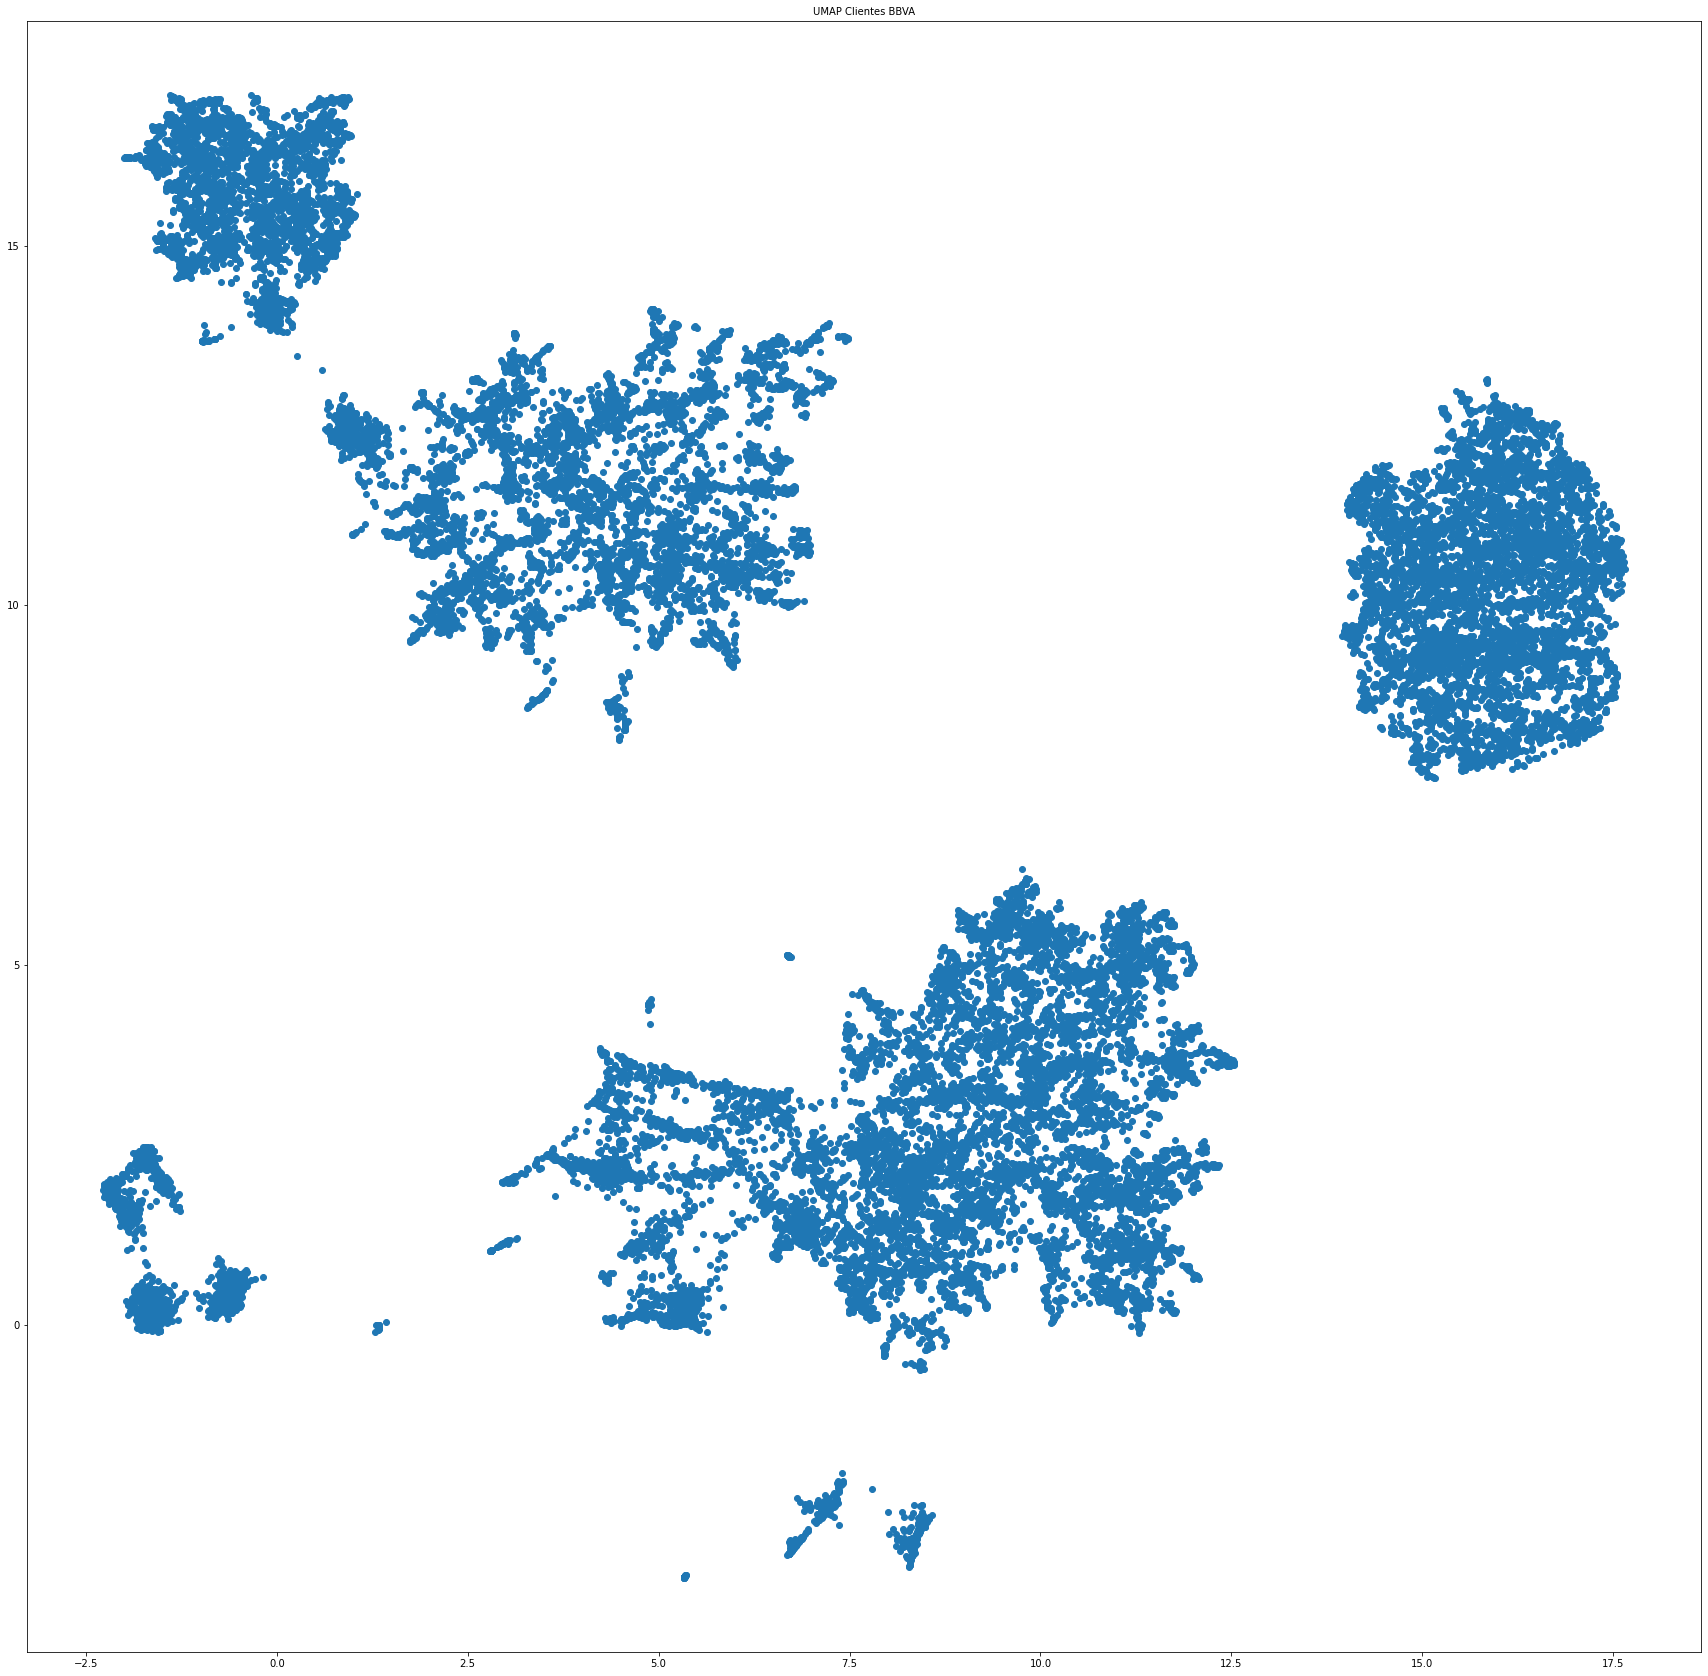

In [ ]:
plt.figure(figsize=(30,30))
plt.scatter(
    embedding[:, 0],
    embedding[:, 1] )
plt.title('UMAP Clientes BBVA', fontsize=10)

In [ ]:
# clusterizamos

from sklearn.cluster import DBSCAN

db_clustering = DBSCAN(eps=1, min_samples=100).fit(embedding)



Text(0.5, 1.0, 'UMAP Clientes BBVA')

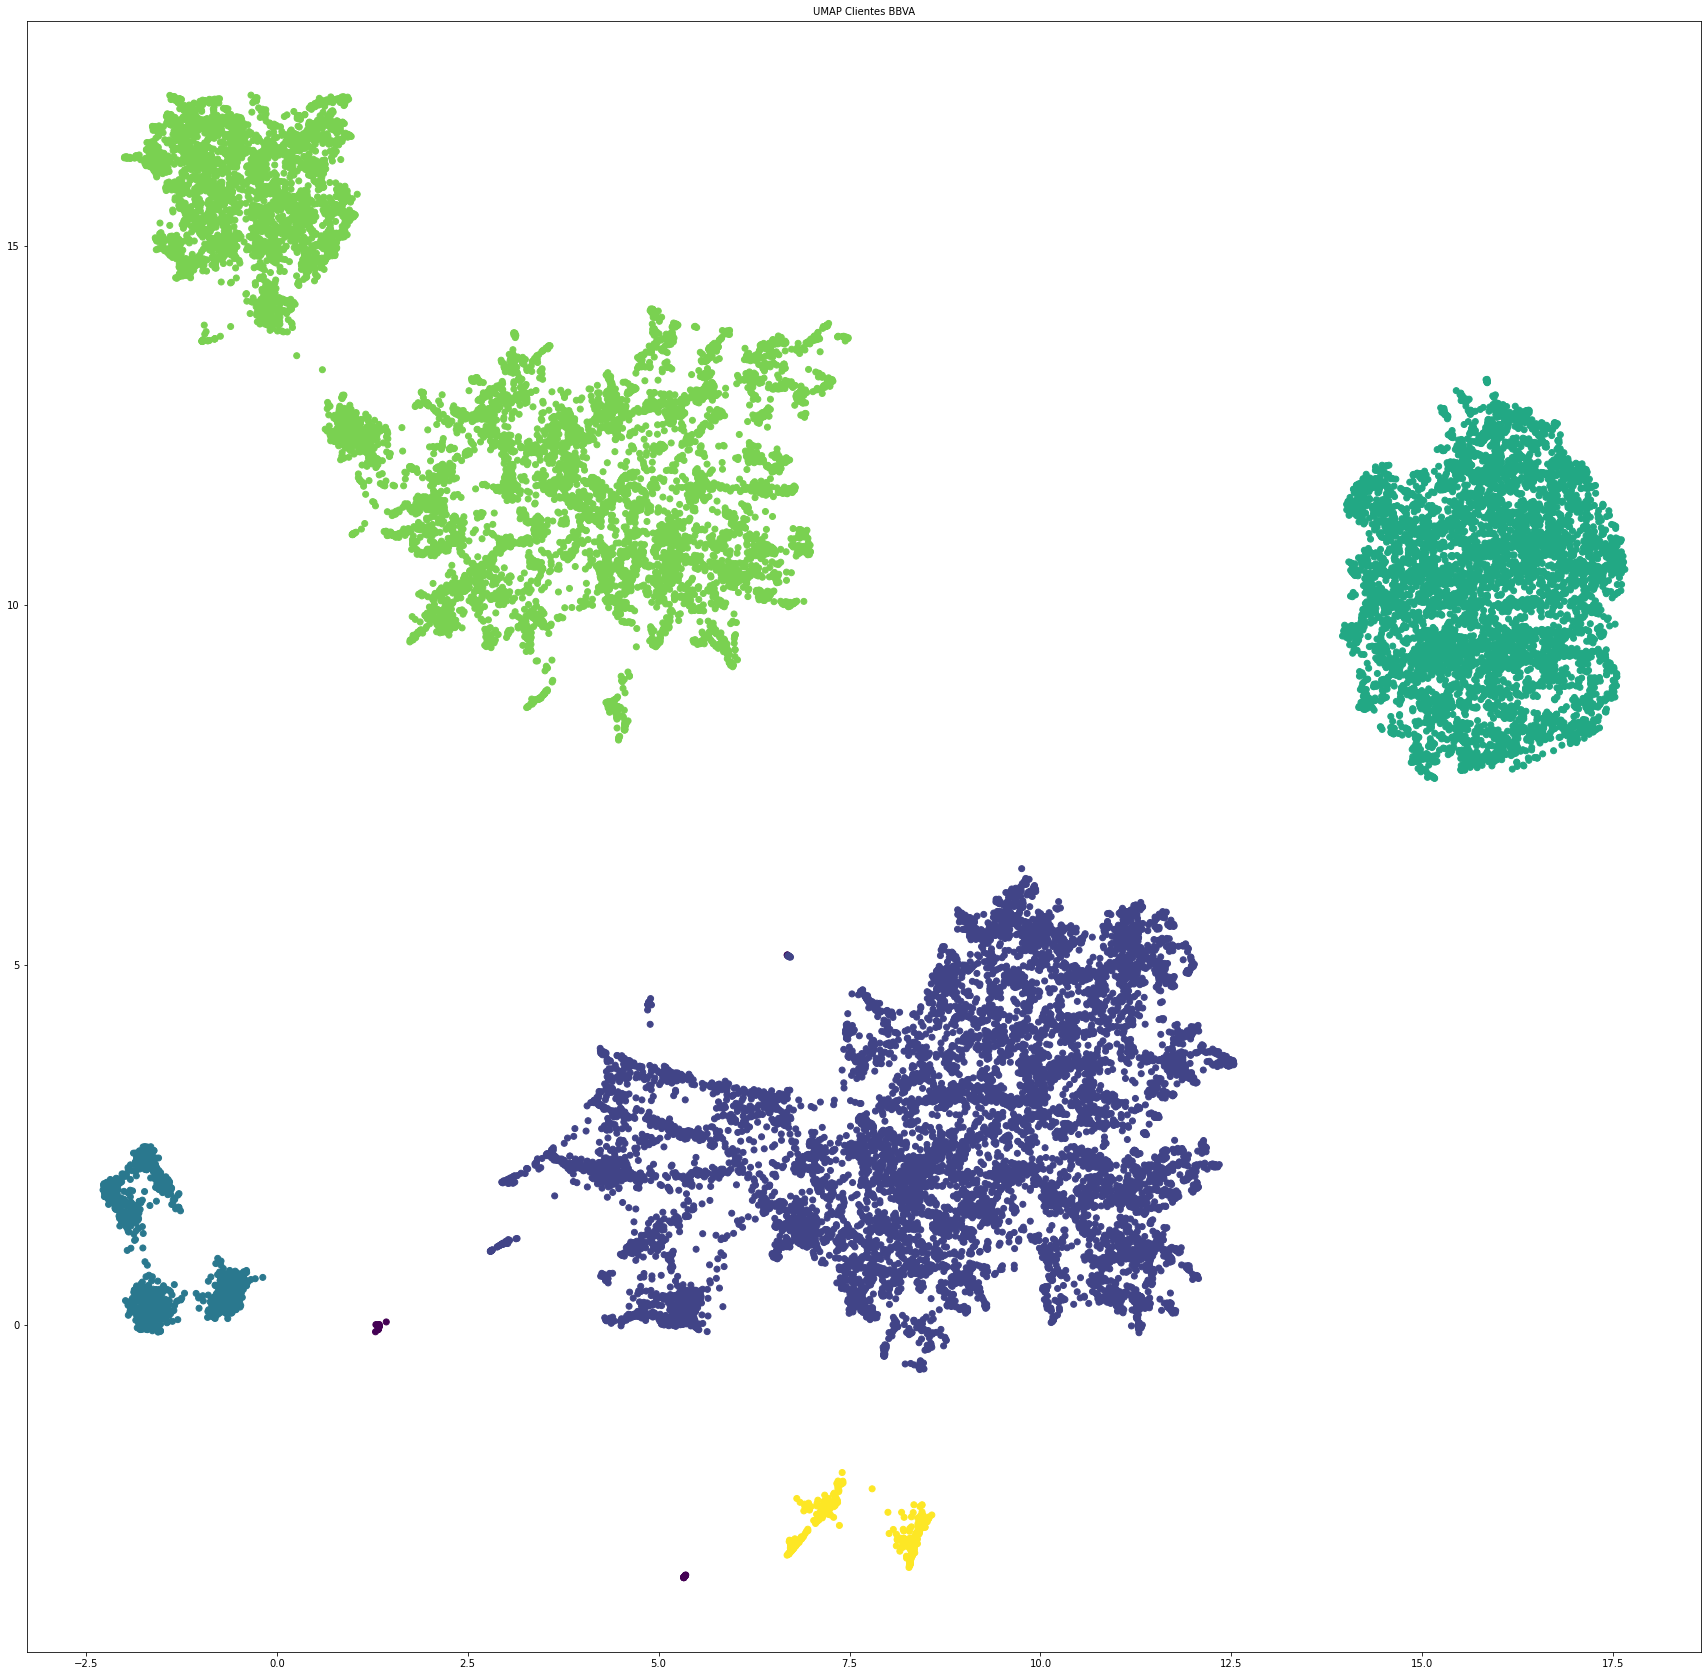

In [ ]:
plt.figure(figsize=(30,30))
plt.scatter(
    embedding[:, 0],
    embedding[:, 1], c= db_clustering.labels_ )
plt.title('UMAP Clientes BBVA', fontsize=10)

In [ ]:
# vamos a estudiar el calculo conjunto del ratio para cada cluster

labels=db_clustering.labels_

labels=pd.Series(labels,name='labels',index=features.index)

# debemos suprimir los OUTLIERS

data_etiquetada=pd.concat(objs=[features,target,labels],axis=1)

# Suprimimos los outliers

data_etiquetada=data_etiquetada[data_etiquetada['labels']!=-1]


In [ ]:
data_etiquetada.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29942 entries, 358898 to 607701
Data columns (total 65 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   UBIGEO_DIRECCION_0                 29942 non-null  int64  
 1   UBIGEO_DIRECCION_1                 29942 non-null  int64  
 2   UBIGEO_DIRECCION_2                 29942 non-null  int64  
 3   UBIGEO_DIRECCION_3                 29942 non-null  int64  
 4   UBIGEO_DIRECCION_4                 29942 non-null  int64  
 5   UBIGEO_DIRECCION_5                 29942 non-null  int64  
 6   UBIGEO_DIRECCION_6                 29942 non-null  int64  
 7   UBIGEO_DIRECCION_7                 29942 non-null  int64  
 8   UBIGEO_DIRECCION_8                 29942 non-null  int64  
 9   UBIGEO_DIRECCION_9                 29942 non-null  int64  
 10  UBIGEO_DIRECCION_10                29942 non-null  int64  
 11  SEGMENTO_COMERCIAL                 29942 non-nul

In [ ]:
def boxPlot(dataframe,xColumn):
  plt.figure(figsize=(7,7))
  sns.boxplot(x=dataframe[xColumn])
  plt.show()

def OutlierData(dataframe,column):
  q3, q1 = np.percentile(dataframe[column], [75 ,25])
  iqr = q3 - q1
  lower = q1-1.5*iqr
  upper = q3+1.5*iqr
  return lower,upper

def dataframeWithoutOutlierInColumn(dataframe,column):
  lower,upper = OutlierData(dataframe,column)
  return dataframe[(dataframe[column] < upper) & (dataframe[column] > lower)]

def barPlot(dataframe,title,xLabel,xColumn,yLabel,yColumn="",hue=False,hue_column=""):
  plt.figure(figsize=(8,5))
  if hue:
    ax = sns.barplot(x=xColumn,y=yColumn,hue=hue_column,data=dataframe,palette="Blues_d")
  else:
    ax = sns.barplot(x=xColumn,y=yColumn,data=dataframe,palette="Blues_d")
  ax.axes.set_title(title,fontsize=20)
  ax.set_xlabel(xLabel,fontsize=15)
  ax.set_ylabel(yLabel,fontsize=15)
  ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
  for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

def ratioRentabilidadGrupo(dataframe,grupo):
  sumNumerador = dataframe[dataframe.labels == grupo]['NUMERADOR_RATIO_RENTABILIDAD'].sum()
  sumDenominador = dataframe[dataframe.labels == grupo]['DENOMINADOR_RATIO_RENTABILIDAD'].sum()
  return sumNumerador/sumDenominador

In [ ]:
clusters = list(data_etiquetada.labels.unique())

Cluster 0


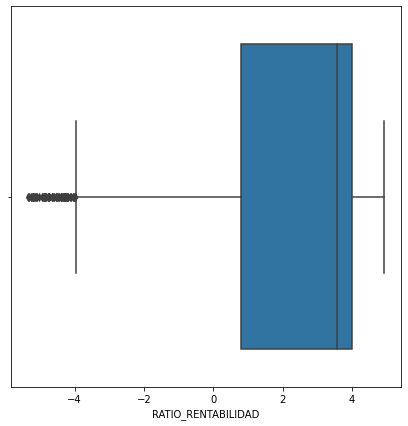

Cluster 1


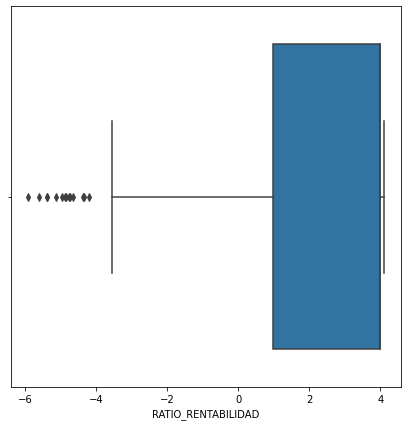

Cluster 2


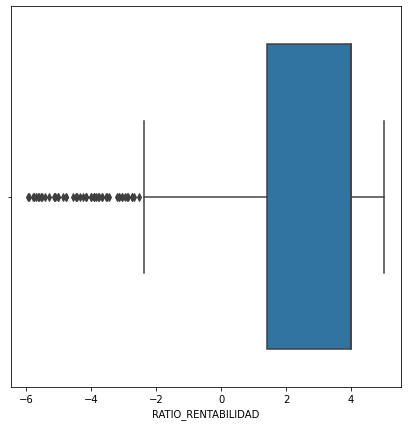

Cluster 3


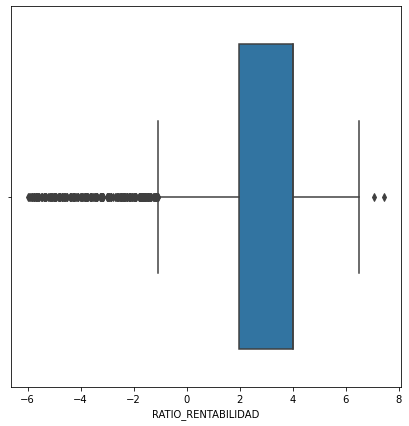

Cluster 4


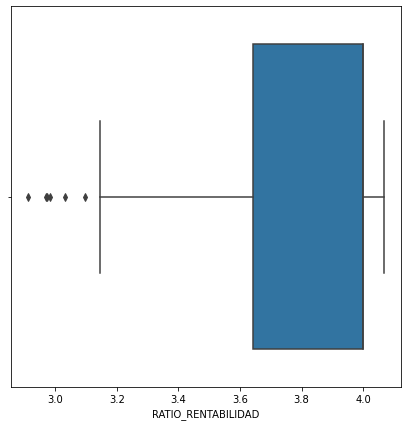

In [ ]:
for c in clusters:
  print(f"Cluster {c}")
  dfAUsar = data_etiquetada[data_etiquetada.labels == c]
  dfAUsar = dataframeWithoutOutlierInColumn(dfAUsar,'RATIO_RENTABILIDAD')
  boxPlot(dfAUsar,'RATIO_RENTABILIDAD')

In [ ]:
ratios = []
for c in clusters:
  ratio = ratioRentabilidadGrupo(data_etiquetada,c).round(4)
  print(f"Ratio rentabilidad del grupo {c} :" +  str(ratio))
  ratios.append(ratio)

Ratio rentabilidad del grupo 0 :0.4351
Ratio rentabilidad del grupo 1 :0.8104
Ratio rentabilidad del grupo 2 :1.5966
Ratio rentabilidad del grupo 3 :-2.028
Ratio rentabilidad del grupo 4 :2.3575


In [ ]:
ratiosDF = pd.DataFrame(np.array([ratios,clusters]).T,columns=['ratio','cluster'])

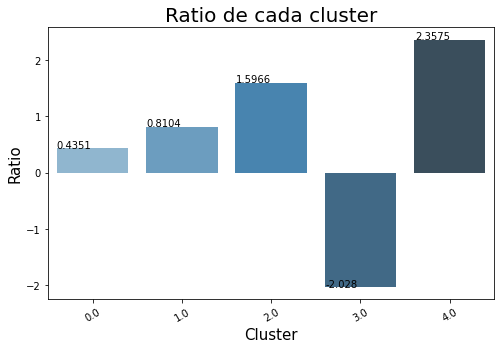

In [ ]:
barPlot(ratiosDF,"Ratio de cada cluster",'Cluster','cluster','Ratio','ratio')